In [2]:
from glob import iglob

import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

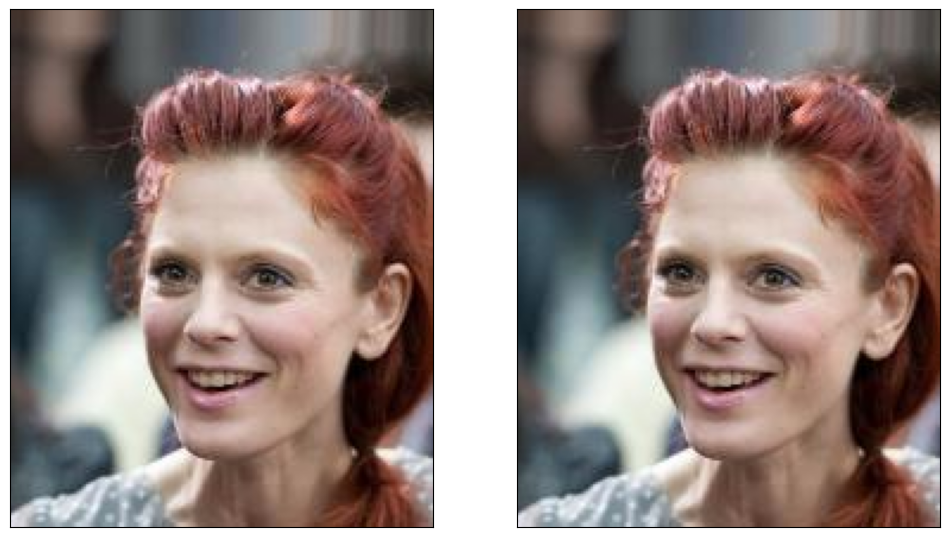

In [26]:
im = imageio.imread(r"images\img_align_celeba\000002.jpg")
im = im.astype(np.uint8)
im_new = im/255
fig, ax = plt.subplots(1, 2, figsize=(12, 12), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(im, cmap='gray')
ax[1].imshow(im_new, cmap='gray')
plt.show()

In [32]:
caras = pd.DataFrame([])

for path in iglob("images/img_align_celeba/*.jpg"):
    im = imageio.imread(path)
    im = np.mean(im, -1)
    cara = pd.Series(im.flatten(), name=path)
    caras = pd.concat([caras, cara], axis=1)

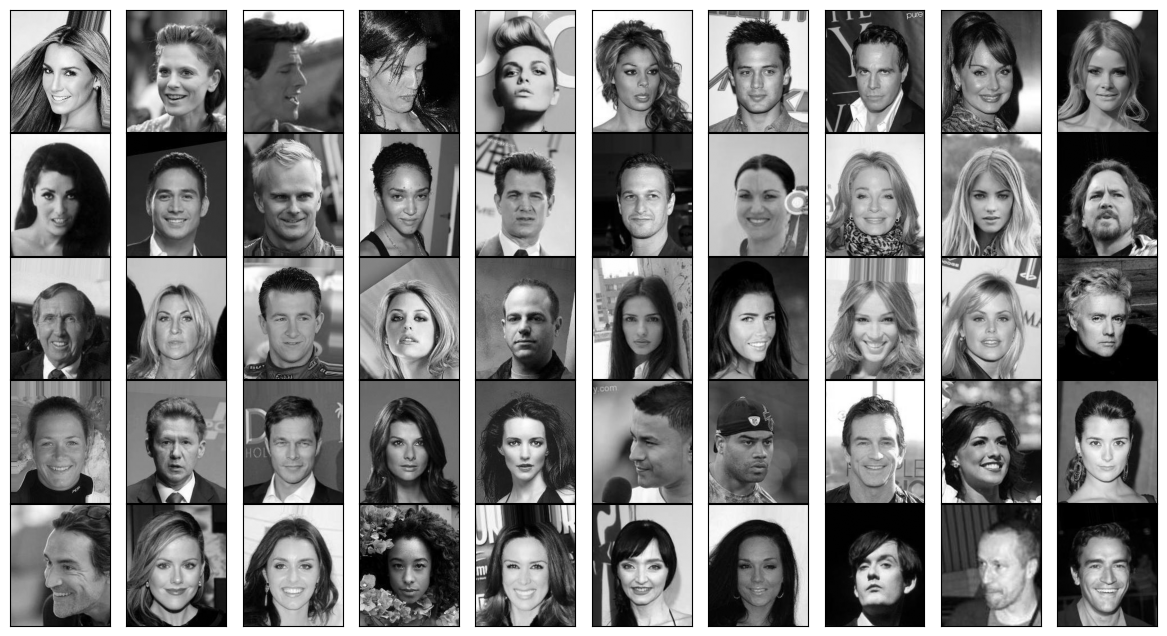

In [43]:
fig, ax = plt.subplots(
    5,
    10,
    figsize=(15, 8),
    subplot_kw={"xticks": [], "yticks": []},
    gridspec_kw=dict(hspace=0.01, wspace=0.01),
)

for i, axi in enumerate(ax.flat):
    axi.imshow(caras.iloc[:, i].values.reshape(im.shape), cmap="gray")

plt.show()

In [44]:
from sklearn.decomposition import PCA

In [85]:
caras_pca = PCA(n_components=0.9)
caras_pca.fit(caras.T)

PCA(n_components=0.9)

In [86]:
caras_pca.components_.shape

(77, 38804)

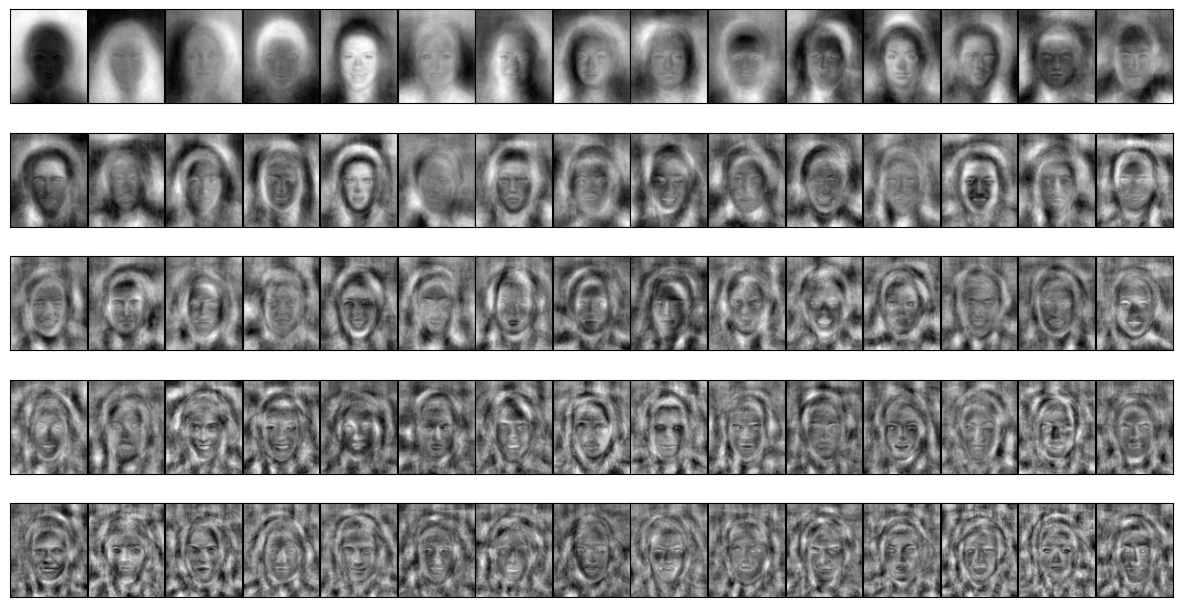

In [87]:
filas = 5
columnas = caras_pca.n_components_ // filas
fig, ax = plt.subplots(
    filas,
    columnas,
    figsize=(15, 8),
    subplot_kw={"xticks": [], "yticks": []},
    gridspec_kw=dict(hspace=0.01, wspace=0.01),
)

for i, axi in enumerate(ax.flat):
    axi.imshow(caras_pca.components_[i].reshape(im.shape), cmap="gray")

In [88]:
components = caras_pca.transform(caras.T)
projection = caras_pca.inverse_transform(components)
projection.shape

(499, 38804)

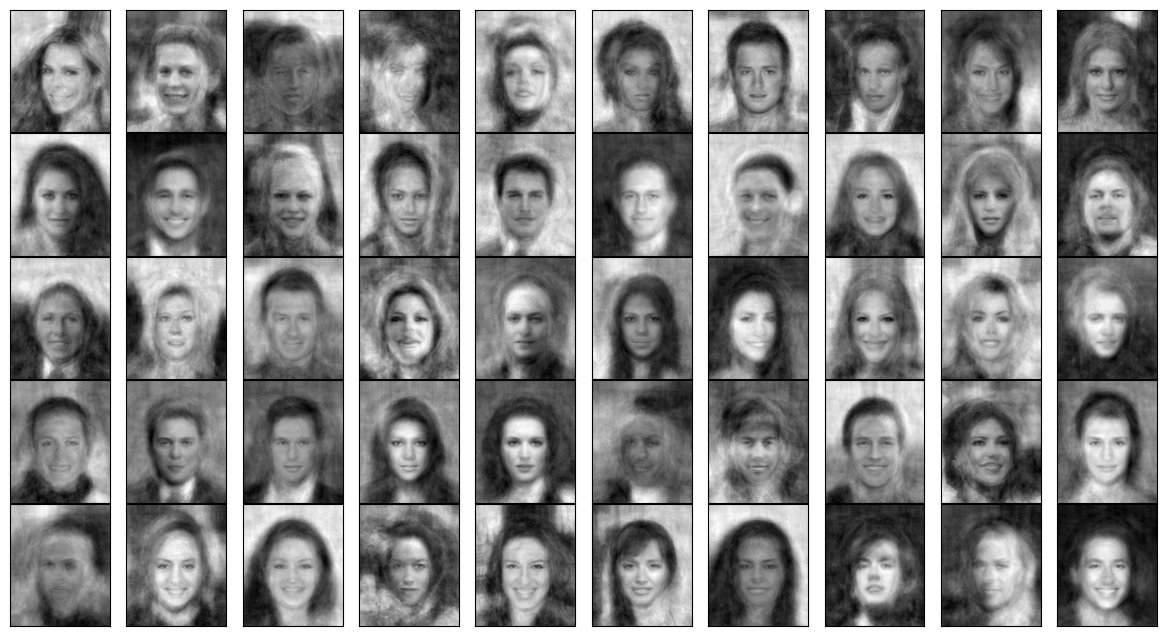

In [89]:
fig, ax = plt.subplots(
    5,
    10,
    figsize=(15, 8),
    subplot_kw={"xticks": [], "yticks": []},
    gridspec_kw=dict(hspace=0.01, wspace=0.01),
)

for i, axi in enumerate(ax.flat):
    axi.imshow(projection[i].reshape(im.shape), cmap="gray")